c:\Py\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Py\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Py\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Py\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Py\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Py\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Py\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encounte

Время обучения (максимизация LL): 64.5106418132782 сек.
Параметры модели (максимизация LL):            0
0 -46.962023
1   1.334688
Accuracy (максимизация LL): 0    0.75
dtype: float64
F1-мера (максимизация LL): 0    0.736842
dtype: float64
Время обучения (минимизация CE): 65.76066565513611 сек.
Параметры модели (минимизация CE):            0
0 -46.962023
1   1.334688
Accuracy (минимизация CE): 0    0.75
dtype: float64
F1-мера (минимизация CE): 0    0.736842
dtype: float64


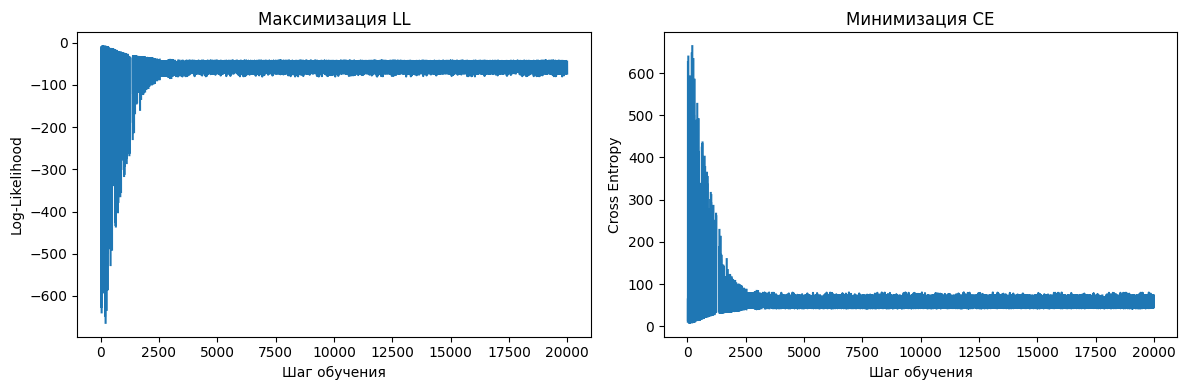

In [13]:
# Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = pd.DataFrame(np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]))
Y = pd.DataFrame(np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]))

# Реализуем класс логистической регрессии с двумя методами оптимизации
class LogisticRegression(object):
    def __init__(self):
        self.a = np.zeros(2).reshape(1, 2)

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x @ self.a))

    def predict(self, x):
        return self.sigmoid(x)

    def coefs(self):
        return self.a

    def LogLikelihood(self, x, Y):
        p = self.predict(x)
        return (Y * np.log(p) + (1 - Y) * np.log(1 - p)).sum()

    def CrossEntropy(self, x, Y):
        p = self.predict(x)
        return (-Y * np.log(p) - (1 - Y) * np.log(1 - p)).sum()

    def accuracy(self, x, Y):
        return ((self.predict(x) > 0.5) == Y).mean()
    
    def f1_score(self, x, Y):
        predictions = self.predict(x)
        true_positives = np.sum(np.logical_and(predictions > 0.5, Y == 1))
        false_positives = np.sum(np.logical_and(predictions > 0.5, Y == 0))
        false_negatives = np.sum(np.logical_and(predictions <= 0.5, Y == 1))
        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        return 2 * (precision * recall) / (precision + recall)

    def fit(self, x, Y, alpha=0.001, epsylon=0.01, max_steps=5000, method="LL"):
        self.a = np.zeros(x.shape[1]).reshape(x.shape[1], 1)
        steps, errors, f1_scores = [], [], []
        step = 0

        for _ in range(max_steps):
            if method == "LL":
                new_error = self.LogLikelihood(x, Y)
                dT_a = x.T @ (Y - self.predict(x))
                self.a += alpha * dT_a
            elif method == "CE":
                new_error = self.CrossEntropy(x, Y)
                dT_a = -x.T @ (Y - self.predict(x))
                self.a -= alpha * dT_a

            f1 = self.f1_score(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            f1_scores.append(f1)
            

        return steps, errors, f1_scores

# Подготовим данные для обучения
x_ = x.copy()
intercept = np.ones((x.shape[0], 1))
x_ = pd.DataFrame(np.concatenate((intercept, x), axis=1))

# Создадим модели с двумя методами оптимизации
regr_LL = LogisticRegression()
regr_CE = LogisticRegression()

# Обучим модели
import time

# Обучим модели
start_time = time.time()
steps_LL, errors_LL, f1_scores_LL = regr_LL.fit(x_, Y, alpha=0.01, max_steps=20000, method="LL")
LL_time = time.time() - start_time

start_time = time.time()
steps_CE, errors_CE, f1_scores_CE = regr_CE.fit(x_, Y, alpha=0.01, max_steps=20000, method="CE")
CE_time = time.time() - start_time

# Выведем результаты
print("Время обучения (максимизация LL):", LL_time, "сек.")
print("Параметры модели (максимизация LL):", regr_LL.coefs())
print("Accuracy (максимизация LL):", regr_LL.accuracy(x_, Y))
print("F1-мера (максимизация LL):", f1_scores_LL[-1])

print("Время обучения (минимизация CE):", CE_time, "сек.")
print("Параметры модели (минимизация CE):", regr_CE.coefs())
print("Accuracy (минимизация CE):", regr_CE.accuracy(x_, Y))
print("F1-мера (минимизация CE):", f1_scores_CE[-1])


# Визуализация процесса обучения
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(steps_LL, errors_LL)
plt.title("Максимизация LL")
plt.xlabel("Шаг обучения")
plt.ylabel("Log-Likelihood")

plt.subplot(122)
plt.plot(steps_CE, errors_CE)
plt.title("Минимизация CE")
plt.xlabel("Шаг обучения")
plt.ylabel("Cross Entropy")

plt.tight_layout()
plt.show()
